# Capstone 3.1- Data Wrangling

In [46]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import matplotlib
import numpy as np
import os 
import seaborn as sns
os.chdir(r'C:\Users\nmur1\Google Drive\Springboard\Capstone3')

In [47]:
file = 'Zillow Market Research.csv'
dfHomeValue = pd.read_csv(file)
file = 'Zillow Rental by Zip.csv'
#dfRent = pd.read_csv(file)

# import and inspect data
print(dfHomeValue.shape)
dfHomeValue.head()


(30367, 306)


,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,1/31/1996,...,12/31/2019,1/31/2020,2/29/2020,3/31/2020,4/30/2020,5/31/2020,6/30/2020,7/31/2020,8/31/2020,9/30/2020
0,61639,0,10025,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,194499.00000,...,1017161,1001805,981628,956932,946262,938152,935478,933945,934712,938408
1,84654,1,60657,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,209719.00000,...,486137,485977,487138,488788,489947,490298,490907,492421,494773,497988
2,61637,2,10023,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,220104.00000,...,1047657,1065121,1076998,1077073,1085711,1090631,1095708,1098853,1106245,1123239
3,91982,3,77494,Zip,TX,TX,Katy,Houston-The Woodlands-Sugar Land,Harris County,203697.00000,...,341746,341495,341715,342198,343290,344231,344812,345089,345863,346555
4,84616,4,60614,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,282776.00000,...,633132,632775,633032,633716,633404,633244,633346,634618,636295,639390


In [48]:
#inspect rental data

print(dfRent.shape)
dfRent.head()


(3243, 87)


,RegionID,ZipCode,SizeRank,MsaName,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,...,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,City,State
0,61639,10025,1,"New York, NY",2971.00000,2984.00000,2997.00000,3010.00000,3023.00000,3036.00000,...,3216.00000,3194.00000,3172.00000,3149.00000,3125.00000,3102.00000,3076.00000,3049.00000,New York,NY
1,84654,60657,2,"Chicago, IL",1561.00000,1567.00000,1572.00000,1577.00000,1582.00000,1587.00000,...,1801.00000,1798.00000,1795.00000,1792.00000,1789.00000,1786.00000,1782.00000,1778.00000,Chicago,IL
2,61637,10023,3,"New York, NY",3145.00000,3154.00000,3162.00000,3170.00000,3177.00000,3184.00000,...,3329.00000,3310.00000,3291.00000,3270.00000,3249.00000,3228.00000,3205.00000,3182.00000,New York,NY
3,91982,77494,4,"Houston, TX",1790.00000,1793.00000,1797.00000,1800.00000,1803.00000,1806.00000,...,1806.00000,1808.00000,1809.00000,1811.00000,1813.00000,1814.00000,1816.00000,1818.00000,Houston,TX
4,84616,60614,5,"Chicago, IL",1760.00000,1765.00000,1770.00000,1775.00000,1780.00000,1785.00000,...,2043.00000,2041.00000,2039.00000,2036.00000,2033.00000,2031.00000,2027.00000,2023.00000,Chicago,IL


In [49]:
# add city and state to rent data set

dfRent['City'] = dfRent.MsaName.str[:-4]
dfRent['State'] = dfRent.MsaName.str[-2:]

In [50]:
#Rename columns, drop unnecessary columns

dfHomeValue.drop(columns = ['RegionID', 'SizeRank'], inplace = True)
dfHomeValue = dfHomeValue.rename(columns={'RegionName': 'ZipCode'})
dfRent = dfRent.rename(columns = {'RegionName': 'ZipCode'})

### Explore Unique Number of Categorical Variables in Each Set

In [51]:
df1 = dfHomeValue.iloc[:,:7].nunique()
df1 /  dfHomeValue.iloc[:,:7].nunique().agg(sum) * 100


ZipCode      63.34773
RegionType    0.00209
StateName     0.10639
State         0.10639
City         30.97190
Metro         1.79611
CountyName    3.66940
dtype: float64

In [52]:
df1 = dfRent.iloc[:,:4].nunique()
df1 /  dfRent.iloc[:,:4].nunique().agg(sum) * 100

RegionID   33.83059
ZipCode    33.83059
SizeRank   31.28521
MsaName     1.05362
dtype: float64

### Plot the Number of Data Points within each state for both the rental and home value files

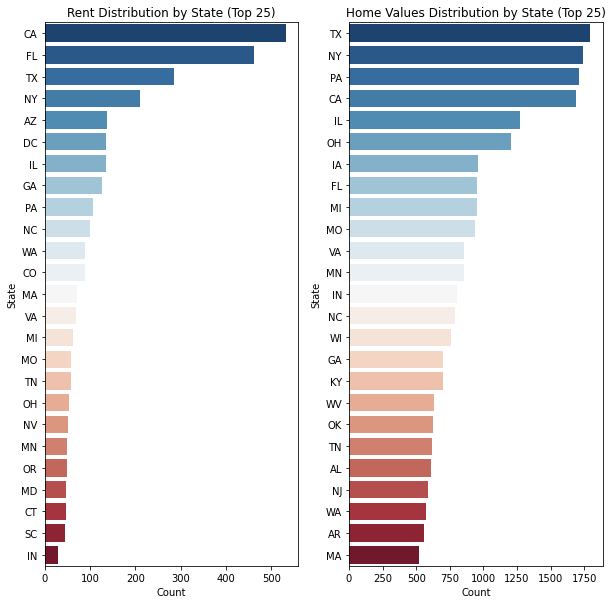

In [53]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,10))

statecount = dfHomeValue.groupby(['ZipCode', 'State']).State.nunique()
statecount = pd.DataFrame(statecount.groupby('State').sum())
statecount.columns = ['Count']
statecount.sort_values(by = 'Count', ascending = False, inplace = True)
statecount = statecount.head(25)

rentstate = dfRent.groupby(['ZipCode', 'State']).State.nunique()
rentstate = pd.DataFrame(rentstate.groupby('State').sum())
rentstate.columns = ['Count']
rentstate.sort_values(by = 'Count', ascending = False, inplace = True)
rentstate = rentstate.head(25)

ax1.set_title('Rent Distribution by State (Top 25)')
ax2.set_title('Home Values Distribution by State (Top 25)')
ax1 = sns.barplot(x=rentstate.Count, y=rentstate.index, palette="RdBu_r", ax = ax1)
ax2 = sns.barplot(x=statecount.Count, y=statecount.index, palette="RdBu_r", ax = ax2)


### Melt the home value file to a format conducive to analysis

In [54]:
#melt data to organize dates as a column attribute
#each row record will represent a date, region, and, price
dfmelt = dfHomeValue.melt(id_vars = ['ZipCode', 'RegionType', 'StateName', 'State', 'City',
                       'Metro', 'CountyName'], var_name = 'Date',value_name = 'Price')
print(dfmelt.shape)
dfmelt.head()


(9018999, 9)


,ZipCode,RegionType,StateName,State,City,Metro,CountyName,Date,Price
0,10025,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,1/31/1996,194499.00000
1,60657,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,1/31/1996,209719.00000
2,10023,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,1/31/1996,220104.00000
3,77494,Zip,TX,TX,Katy,Houston-The Woodlands-Sugar Land,Harris County,1/31/1996,203697.00000
4,60614,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,1/31/1996,282776.00000


In [55]:
#inspect new dataset - need to convert date and price to proper data types
#remove commas from price and convert to float
#convert date to pd datetime
dfmelt['Price'] = dfmelt.Price.apply(lambda x: str(x).replace(',','')).astype('float')
dfmelt['Date'] = pd.to_datetime(dfmelt.Date)
dfmelt['ZipCode'] = dfmelt.ZipCode.astype('object')
dfmelt.dtypes

ZipCode               object
RegionType            object
StateName             object
State                 object
City                  object
Metro                 object
CountyName            object
Date          datetime64[ns]
Price                float64
dtype: object

In [56]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
dfmelt.describe()

,Price
count,6923701.00000
mean,183152.64942
std,175105.14390
min,10093.00000
25%,88292.00000
50%,135352.00000
75%,214650.00000
max,7240530.00000


In [57]:
#filter df to only needed columns
dfMonthlyPrice = dfmelt[['ZipCode', 'Date', 'Price']].dropna()
dfMonthlyPrice.head()

,ZipCode,Date,Price
0,10025,1996-01-31,194499.00000
1,60657,1996-01-31,209719.00000
2,10023,1996-01-31,220104.00000
3,77494,1996-01-31,203697.00000
4,60614,1996-01-31,282776.00000


In [58]:
#drop US record
dfMonthlyPrice = dfMonthlyPrice.drop([0])

dfMonthlyPrice = dfMonthlyPrice.sort_values(by = ['ZipCode','Date'])
dfMonthlyChange = dfMonthlyPrice
dfMonthlyChange['chg'] = dfMonthlyPrice.groupby(['ZipCode'])['Price'].pct_change().fillna(0)

In [59]:
dfMonthlyChange

,ZipCode,Date,Price,chg
4403167,501,2008-01-31,119481.00000,0.00000
4433534,501,2008-02-29,119218.00000,-0.00220
4463901,501,2008-03-31,119363.00000,0.00122
4494268,501,2008-04-30,118971.00000,-0.00328
4524635,501,2008-05-31,118650.00000,-0.00270
...,...,...,...,...
8883995,99929,2020-05-31,237894.00000,0.00431
8914362,99929,2020-06-30,238640.00000,0.00314
8944729,99929,2020-07-31,239688.00000,0.00439
8975096,99929,2020-08-31,240718.00000,0.00430


### Pivot to zip codes on rows. Montlhy percentage price changes as columns for cluster analysis

In [60]:

pvtMonthlyChg = dfMonthlyChange.pivot(index = 'ZipCode',columns = 'Date', values = 'chg')
pvtMonthlyChg = pvtMonthlyChg.dropna()


pvtMonthlyChg

Date,1996-01-31,1996-02-29,1996-03-31,1996-04-30,1996-05-31,1996-06-30,1996-07-31,1996-08-31,1996-09-30,1996-10-31,...,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30
ZipCode,,,,,,,,,,,,,,,,,,,,,
1001,0.00000,0.00149,0.00372,0.00450,0.00275,-0.00034,0.00129,0.00126,0.00105,0.00044,...,0.00384,0.00391,0.00391,0.00346,0.00252,0.00302,0.00498,0.00655,0.00807,0.00877
1002,0.00000,-0.00132,-0.00073,-0.00133,-0.00034,-0.00003,0.00114,0.00286,0.00301,0.00075,...,0.00264,0.00548,0.00655,0.00837,0.01003,0.00650,0.00417,0.00381,0.00691,0.00670
1005,0.00000,-0.00258,-0.00050,0.00204,0.00220,0.00491,0.00181,0.00132,-0.00515,-0.00481,...,0.00681,0.00414,0.00257,0.00500,0.00447,0.00266,0.00011,0.00579,0.01140,0.01550
1007,0.00000,-0.00197,0.00014,-0.00075,0.00222,0.00052,0.00179,0.00113,0.00317,0.00506,...,0.00339,0.00559,0.00639,0.01032,0.01295,0.00968,0.00664,0.00647,0.00892,0.00769
1008,0.00000,0.00669,0.00455,0.00626,0.00021,-0.00232,-0.00176,-0.00008,0.00095,0.00043,...,-0.00539,-0.00163,0.00258,-0.00010,0.00000,-0.00294,-0.00029,-0.00147,-0.00092,0.00392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99517,0.00000,0.00272,0.00219,0.00411,0.00351,0.00547,0.00651,0.00473,0.00341,0.00091,...,0.00553,0.00609,-0.00043,0.00122,-0.00690,0.00370,0.00462,0.00935,0.00535,0.00777
99518,0.00000,0.00106,-0.00029,0.00017,0.00018,0.00295,0.00446,0.00391,0.00266,0.00082,...,0.00703,0.00574,-0.00040,-0.00118,-0.00876,0.00015,0.00218,0.00707,0.00296,0.00171
99567,0.00000,0.00932,0.01228,0.02191,0.01606,0.01194,0.00900,0.01140,0.00720,0.00585,...,0.00122,-0.00292,-0.01151,-0.01216,-0.00976,0.00049,-0.00434,-0.00626,-0.01059,-0.00558


In [71]:
os.chdir(r'C:\Users\nmur1\Google Drive\Springboard\Capstone3\CleanData')
pvtMonthlyChg.to_pickle('Monthly_Housing')
dfMonthlyPrice.to_pickle('MonthlyPrices')
dfHomeValue.to_pickle('HomeValues')
#dfRent.to_csv('RentCleaned.csv')

In [62]:
import pandas as pd
from pandas_datareader.data import DataReader
from pandas.tseries.offsets import MonthEnd
from datetime import date
import requests
import collections

In [63]:
#function to switch monthly dates to month end date - setting this up so we can merge to the housing data on the date column
def ME(field, num):
    return pd.to_datetime(field) + MonthEnd(num)

In [64]:
#define start date
start = date(1990,1,1)

#GDP Data
GDP = DataReader('GDPC1', 'fred', start )
GDP['growth'] = GDP.GDPC1.pct_change(periods = 1)
GDP = GDP.reset_index()
GDP.columns = ['DATE', 'GDP', 'GDP Growh']

#ensure all monthly dates represent month end date
GDP['DATE'] = pd.to_datetime(GDP['DATE']) + MonthEnd(1)


#30 Year fixed mortgage interest rate
MortRate = DataReader('MORTGAGE30US', 'fred',start).reset_index()
MortRate = MortRate.set_index(pd.to_datetime(MortRate.DATE)).drop(columns = 'DATE')

#data pulls weekly rates - resample to monthly average
MortRate = MortRate.resample('M').mean().reset_index()

#import unemployment rate
UNRATE = DataReader('UNRATE', 'fred',start).reset_index()
#ensure all monthly dates represent month end date
UNRATE['DATE'] = pd.to_datetime(UNRATE['DATE']) + MonthEnd(1)


#import Consumer Sentiment Score
CS = DataReader('UMCSENT', 'fred', start).reset_index()
#ensure all monthly dates represent month end date
CS['DATE'] = pd.to_datetime(CS['DATE']) + MonthEnd(1)


HOUST = DataReader('HOUST', 'fred',start).reset_index()
#ensure all monthly dates represent month end date
HOUST.DATE = HOUST.DATE.apply(ME, args = (1,))

In [65]:
# define function to pull Qundal Data

def Quandl(url, param_dict, col_names):
    
    r = requests.get(url, params = param_dict)
    json_data = r.json()
    df = pd.DataFrame(json_data['dataset']['data'], columns = col_names)
    df.DATE = df.DATE.astype('datetime64[ns]')
    return df





In [66]:
# Import S&P 500 P&E Ratios
API_KEY = 'pTsozhv5F_xzhfyMkVQi'
url = "https://www.quandl.com/api/v3/datasets/MULTPL/SP500_PE_RATIO_MONTH.json"
p = dict(start_date = '1990-01-01' , api_key = API_KEY)

#call my quandl function
PE = Quandl(url, p, ['DATE', 'PE_Ratio'])


#most months produced only one record (at the beginning of the month)
#some were producing two records one on the first and one on the last. Filter data to only first of month

PE = PE[pd.to_datetime(PE["DATE"]).dt.is_month_end == False]
#switch dates to month end date
PE['DATE'] = pd.to_datetime(PE['DATE']) + MonthEnd(-1)

#Import S&P Prices and Get Growth Rate by Quarter

API_KEY = 'pTsozhv5F_xzhfyMkVQi'
url = "https://www.quandl.com/api/v3/datasets/MULTPL/SP500_REAL_PRICE_MONTH.json"
p = dict(start_date = '1990-01-01' , api_key = API_KEY)

#call my quandl function
SP = Quandl(url, p, ['DATE', 'SP_Value'])
SP = SP.sort_values(by= 'DATE')


#Calculate percent changes from prior quarter
SP['SP500 Growth'] = SP['SP_Value'].pct_change()

SP = SP[pd.to_datetime(SP["DATE"]).dt.is_month_end == False]
SP.DATE = SP.DATE.apply(ME, args = (-1,))

In [67]:
#Merge everything together
dfMacro = MortRate.merge(GDP, on = 'DATE', how = 'left').fillna(method = "ffill")
dfMacro = dfMacro.merge(UNRATE, on = 'DATE', how = 'left')
dfMacro = dfMacro.merge(CS, on = 'DATE', how = 'left')
dfMacro = dfMacro.merge(HOUST, on = 'DATE', how = 'left')
dfMacro = dfMacro.merge(SP, on = 'DATE', how = 'left')
dfMacro = dfMacro.merge(PE, on = 'DATE', how = 'left')

In [68]:
#Review NA Values
dfMacro.isna().sum()

DATE            0
MORTGAGE30US    0
GDP             0
GDP Growh       3
UNRATE          1
UMCSENT         1
HOUST           1
SP_Value        2
SP500 Growth    2
PE_Ratio        2
dtype: int64

In [69]:
#drop NA values
dfMacro = dfMacro.dropna()

In [70]:
dfMacro.to_csv('MacroIndicators.csv')